In [1]:
#Step 1: import libraries and dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\samue\Downloads\bank-additional-full.csv", sep=';')

In [2]:
#Step 2: Preliminary view of the data

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<Axes: xlabel='y', ylabel='Count'>

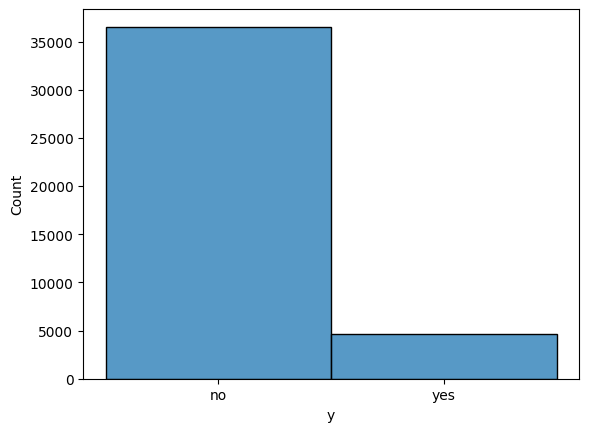

In [4]:
# The below histogram shows that the target value is imbalance and hence sampling technique need to be applied in the model design.
sns.histplot(data=df, x='y')

   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11 - duration: last contact duration, in seconds (numeric).
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)

In [5]:
# Check if there is any duplicate data and drop them
df[df.duplicated()]

# Proceed to drop due to immateiral number of records (<1%)
df.drop_duplicates(inplace=True)

In [6]:
# Split the features between catgorical and numerical
categorical = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
numerical = ['age','duration', 'campaign','pdays','previous','emp.var.rate','cons.conf.idx','euribor3m','nr.employed']
target = 'y'

# Check the number of 'unknown variable'
for i in categorical:
    print(i)
    print(len(df[df[i]=='unknown']))

job
330
marital
80
education
1730
default
8596
housing
990
loan
990
contact
0
month
0
day_of_week
0
poutcome
0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'student')])

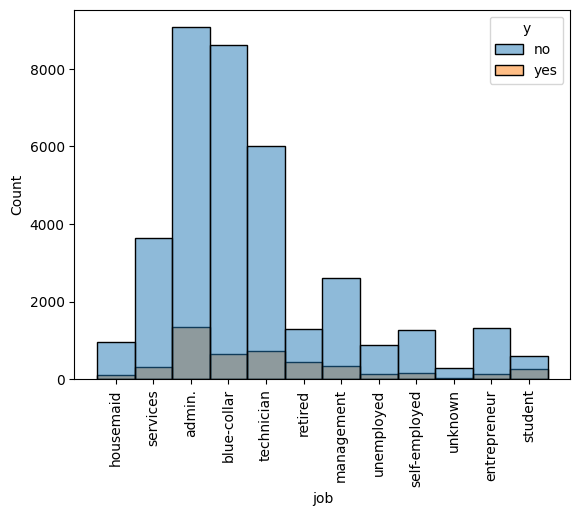

In [7]:
# Check if the unknown job data would have lots of positive target value
sns.histplot(data=df, x='job', hue='y')
plt.xticks(rotation=90)

([0, 1, 2, 3],
 [Text(0, 0, 'married'),
  Text(1, 0, 'single'),
  Text(2, 0, 'divorced'),
  Text(3, 0, 'unknown')])

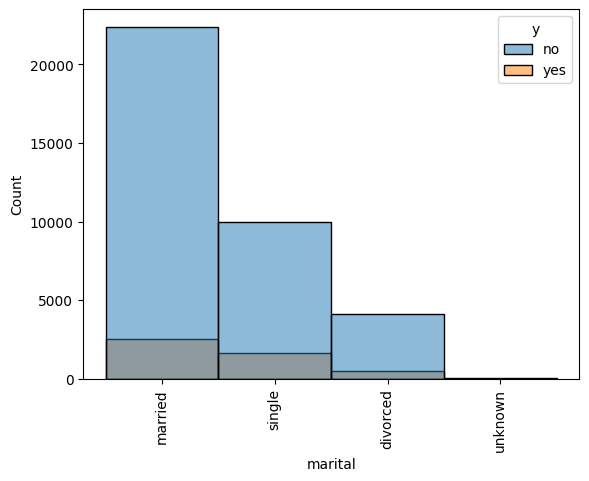

In [8]:
# Check if the unknown marital data would have lots of positive target value
sns.histplot(data=df, x='marital', hue='y')
plt.xticks(rotation=90)

In [9]:
# Unknown value for job and marital are immaterial, hence proposed to drop them
# Default, housing and loan are impute as no first. For default column, it will be dropped subsequently due to limited case of default.
# education remain as unknown category

df.drop(df[(df['job'] == 'unknown') | (df['marital'] == 'unknown')].index, inplace=True)
df['default'] = df['default'].apply(lambda x: 'no' if x == 'unknown' else x)
df['housing'] = df['housing'].apply(lambda x: 'no' if x == 'unknown' else x)
df['loan'] = df['loan'].apply(lambda x: 'no' if x == 'unknown' else x)

In [10]:
# Imputation for education
# summarize the most frequent education level by job
job_mapping = df.groupby('job')['education'].apply(lambda x: x.mode().iloc[0])
# transform the summary to dictionary
job_mapping_dict = job_mapping.to_dict()
# apply the mapping to the unknown value
df['education'] = df.apply(lambda row: job_mapping_dict[row['job']] if (row['education'] == 'unknown') else row['education'], axis=1)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'basic.4y'),
  Text(1, 0, 'high.school'),
  Text(2, 0, 'basic.6y'),
  Text(3, 0, 'basic.9y'),
  Text(4, 0, 'professional.course'),
  Text(5, 0, 'university.degree'),
  Text(6, 0, 'illiterate')])

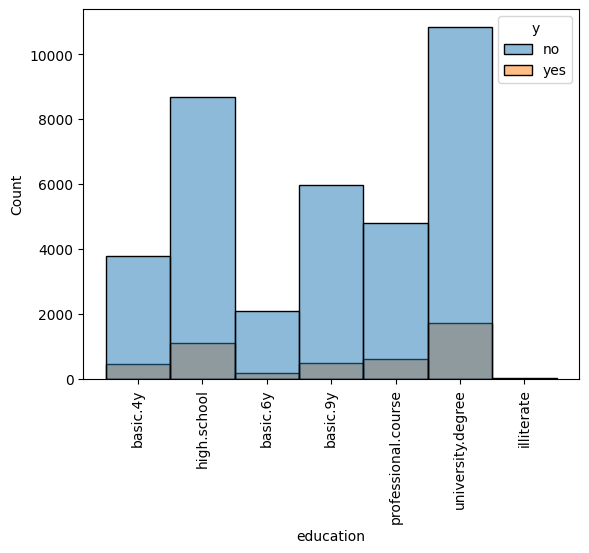

In [11]:
# Check if the imputation of education level
sns.histplot(data=df, x='education', hue='y')
plt.xticks(rotation=90)

In [12]:
# Review the numerical details
df[numerical].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,euribor3m,nr.employed
count,40775.000000,40775.000000,40775.000000,40775.000000,40775.000000,40775.000000,40775.000000,40775.000000,40775.000000
mean,39.978541,258.360932,2.566401,962.714752,0.172925,0.080552,-40.516039,3.619534,5167.016809
std,10.401573,259.295917,2.768411,186.319804,0.494927,1.570054,4.626463,1.734406,72.231672
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,-26.900000,5.045000,5228.100000


In [13]:
len(df[df['campaign']>10])

857

<Axes: xlabel='pdays', ylabel='Count'>

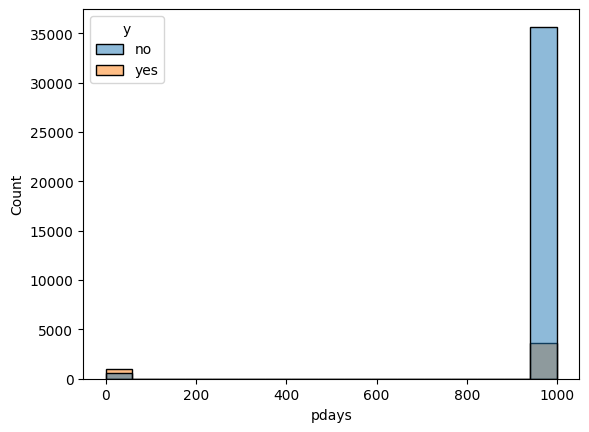

In [14]:
sns.histplot(data=df, x='pdays', hue='y')

<Axes: xlabel='previous', ylabel='y'>

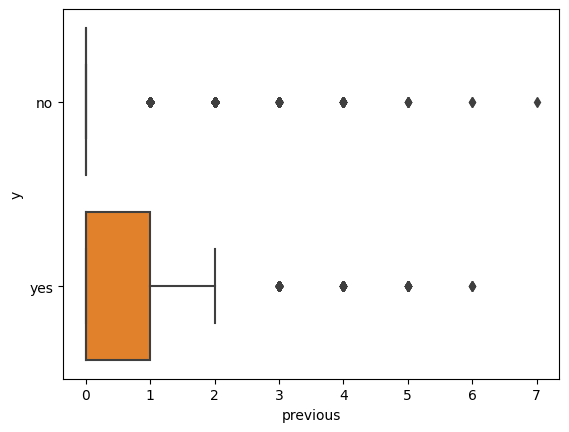

In [15]:
sns.boxplot(data=df, x='previous', y='y')

In [16]:
# drop the duration since it is not known until the call was done
# clear the outliers of campaign since it is not reasonable to call mutliple times in the same campaign (use 10 as a reference based on mean + 3 s.d.)
# drop the pdays column since majority of the value is 999

df.drop(['duration'], axis=1, inplace=True)
df.drop((df[df['campaign'] > (df['campaign'].mean() + 3 * np.std(df['campaign']))]).index, axis=0, inplace=True)


In [17]:
# update the list of numerical value
numerical = ['campaign','previous','pdays','emp.var.rate','cons.conf.idx','euribor3m','nr.employed']
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39918.000000,39918.000000,39918.000000,39918.000000,39918.000000,39918.000000,39918.000000,39918.000000,39918.000000
mean,39.970264,2.273436,961.985220,0.176362,0.057638,93.567189,-40.516767,3.595980,5166.018182
std,10.417499,1.715742,188.112514,0.499277,1.574721,0.579003,4.650715,1.740739,72.503011
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,10.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


array([[1.       , 0.9057189],
       [0.9057189, 1.       ]])

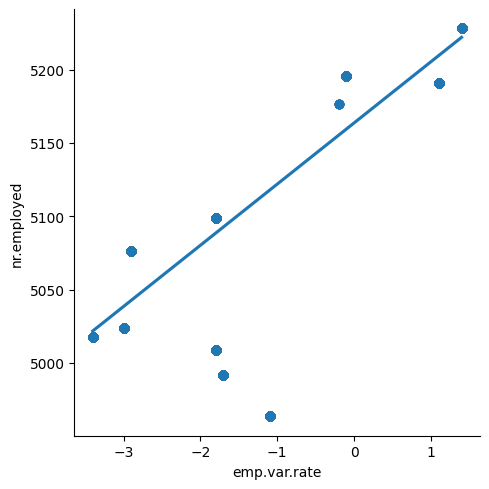

In [18]:
# review the relationship between emp.var.rate and nr.employed
sns.lmplot(data=df, x='emp.var.rate', y='nr.employed')
np.corrcoef(df['emp.var.rate'],df['nr.employed'])

In [19]:
# high relationship between nr.employed and emp.var.rate, hence suggest to remove nr.employed to avoid duplication of features
df.drop(['nr.employed'], axis=1, inplace=True)
numerical = ['campaign','previous','pdays','emp.var.rate','cons.conf.idx','euribor3m']
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,39918.000000,39918.000000,39918.000000,39918.000000,39918.000000,39918.000000,39918.000000,39918.000000
mean,39.970264,2.273436,961.985220,0.176362,0.057638,93.567189,-40.516767,3.595980
std,10.417499,1.715742,188.112514,0.499277,1.574721,0.579003,4.650715,1.740739
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,98.000000,10.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000


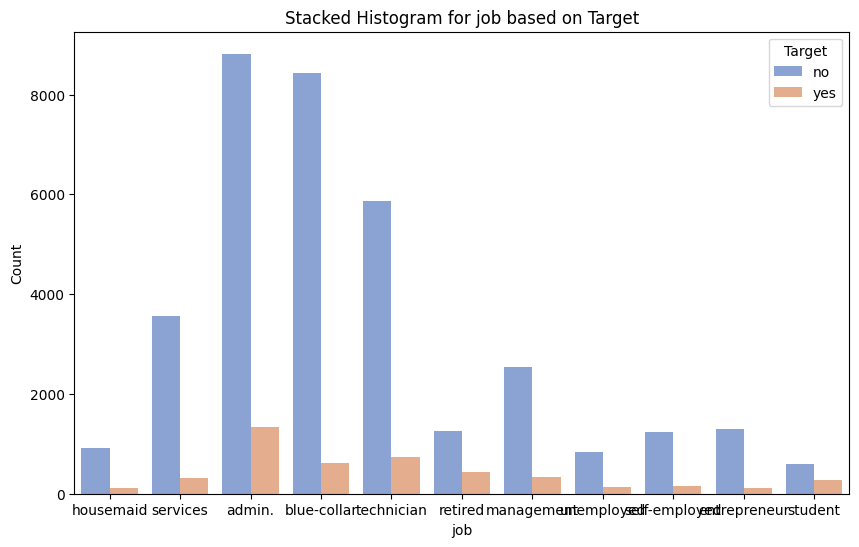

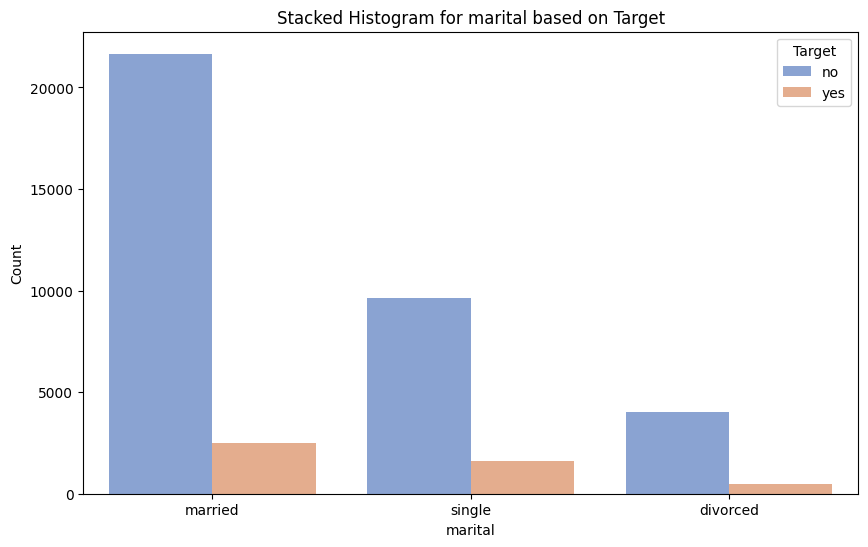

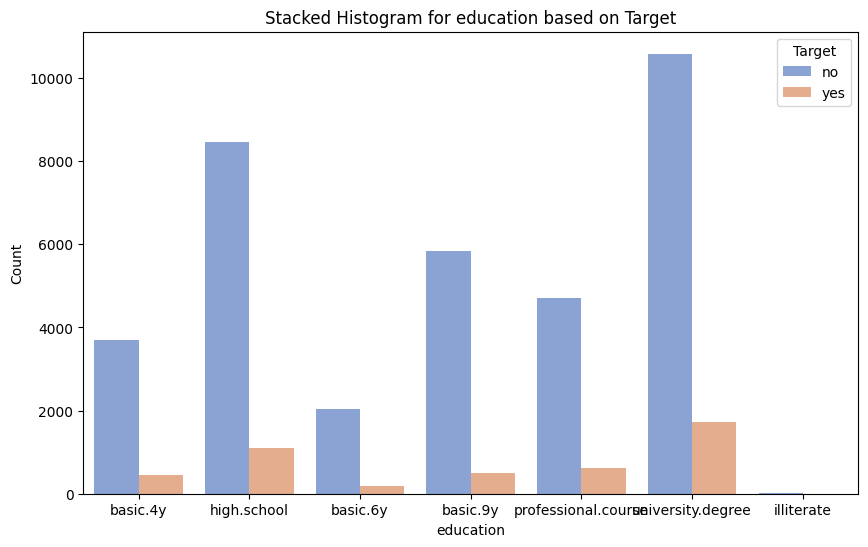

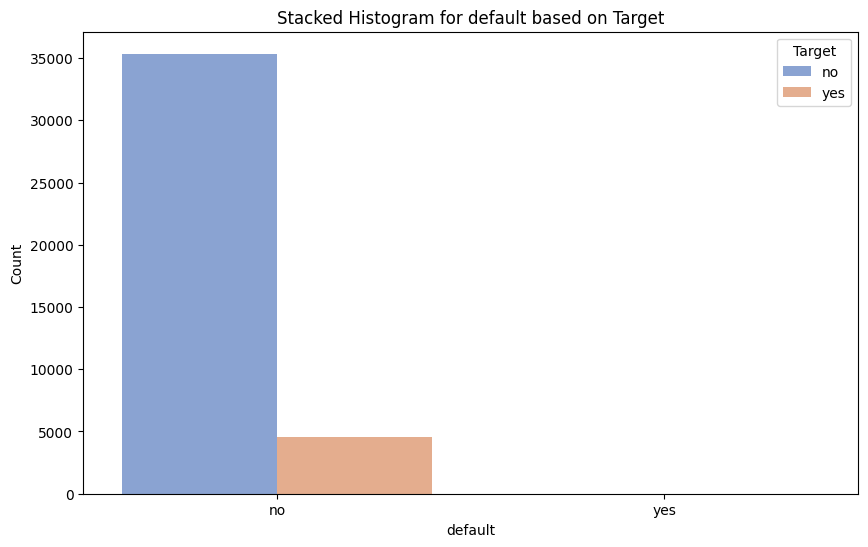

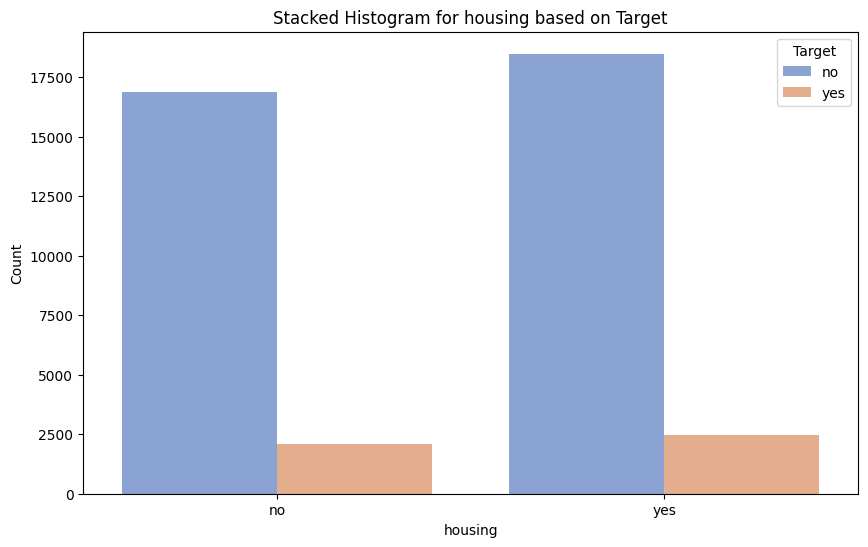

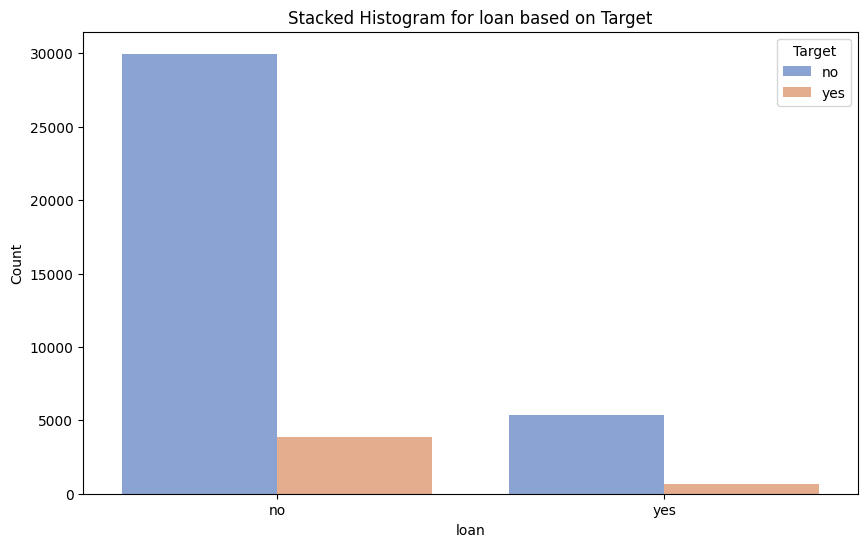

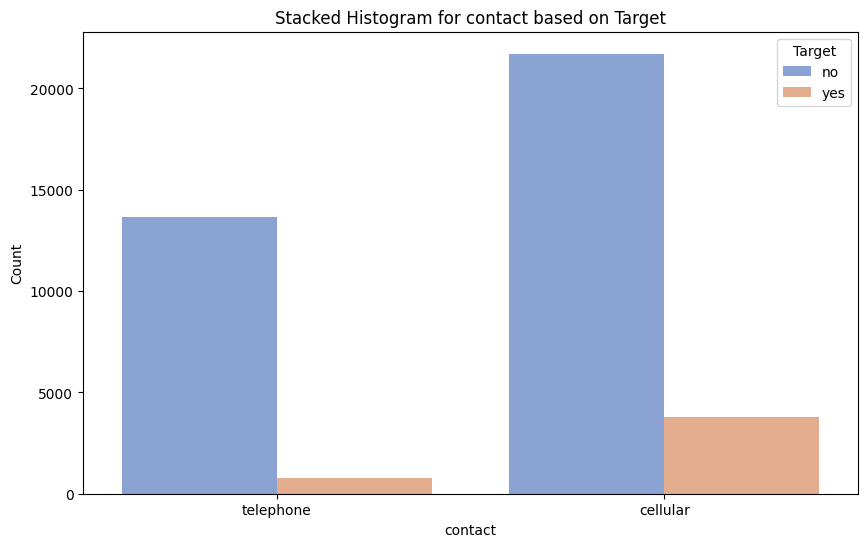

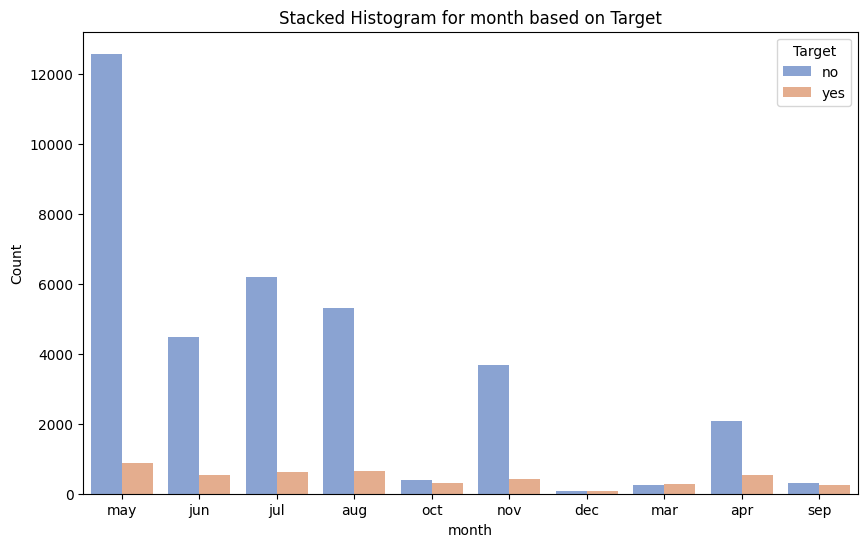

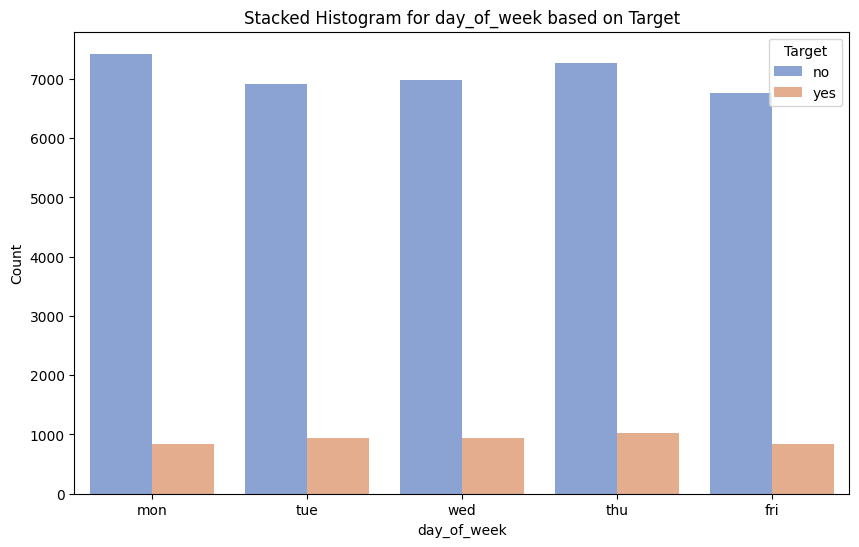

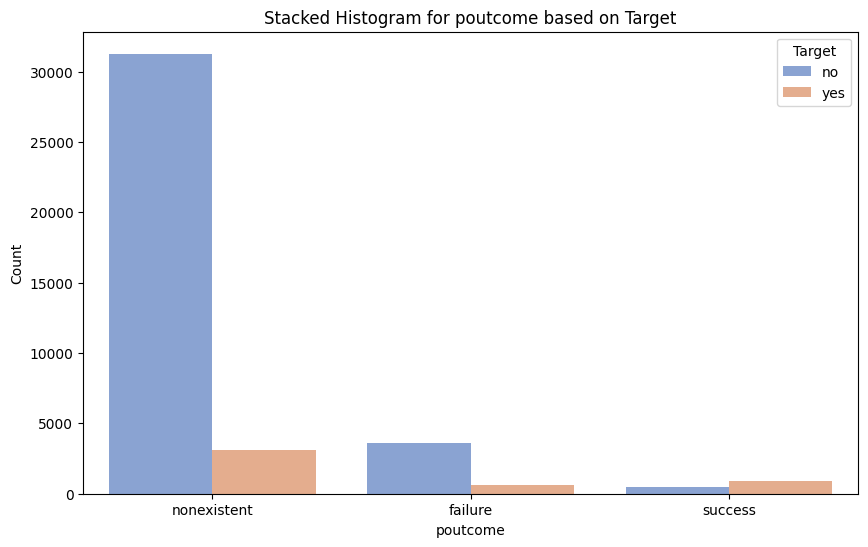

In [20]:
# plot histogram for categorical variable

for var in categorical:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, data=df, hue=target, palette='muted', alpha=0.7)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Stacked Histogram for {var} based on Target')
    plt.legend(title='Target', loc='upper right')
    plt.show()

The above analysis indicate that the success rate has less dependency on the day_of_week and existence of housing loan as they're distributed uniformly acorss the categorical values. Remove default columns since there is only three default cases.  Further, whether a client is default is not relevant to a deposit business.  It matters more for loan business.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


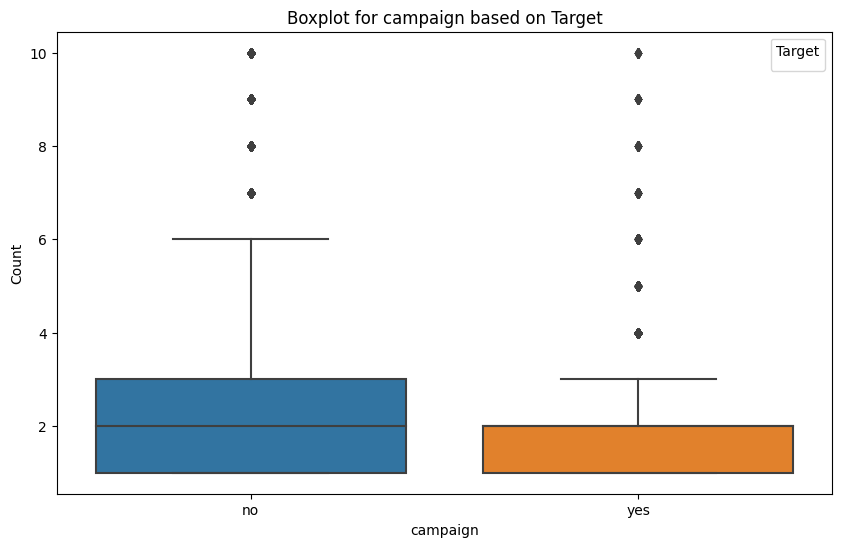

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


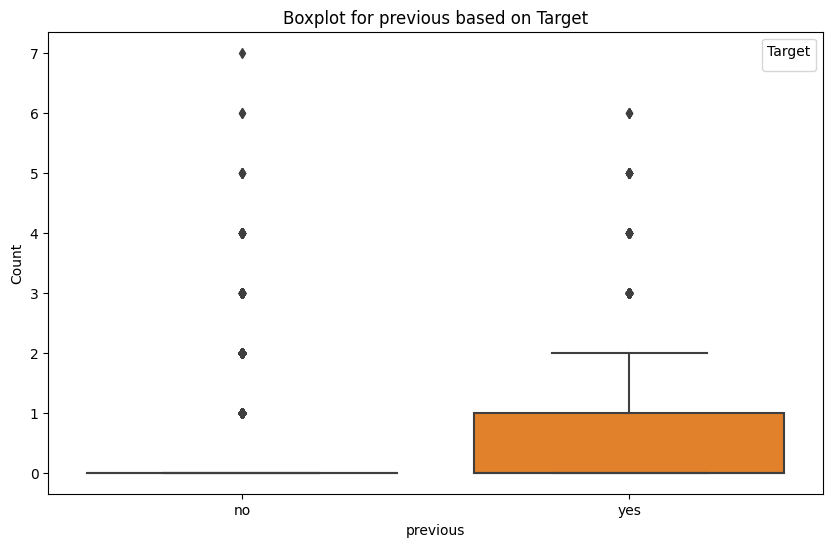

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


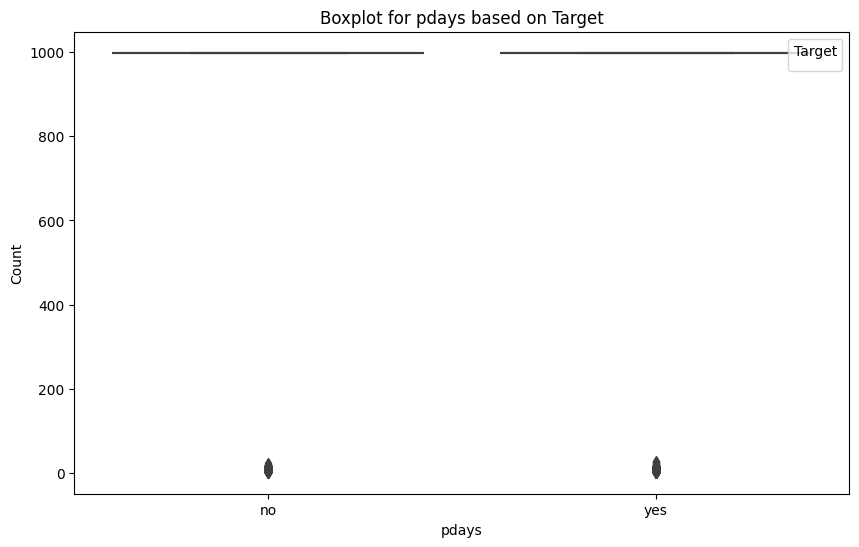

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


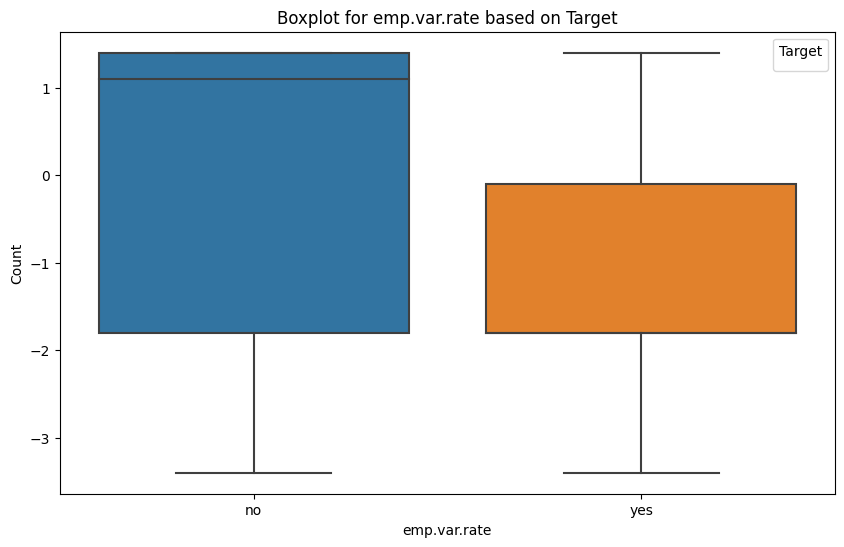

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


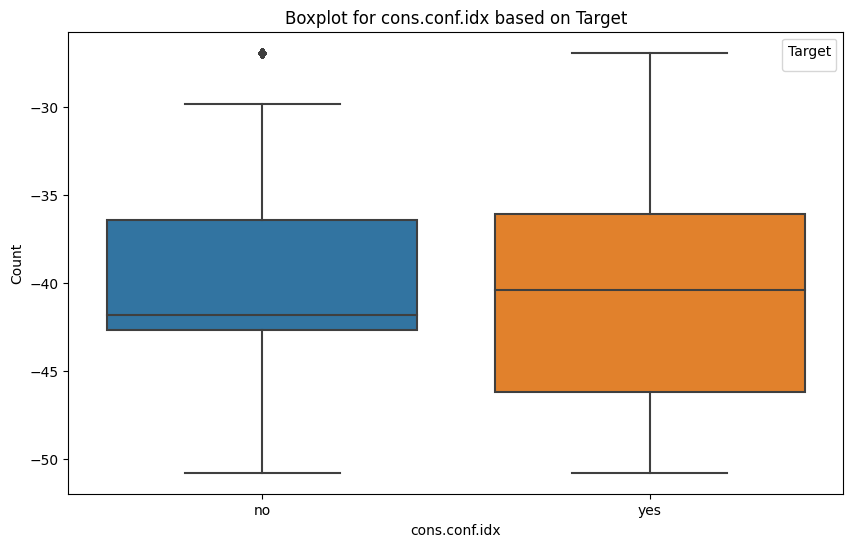

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


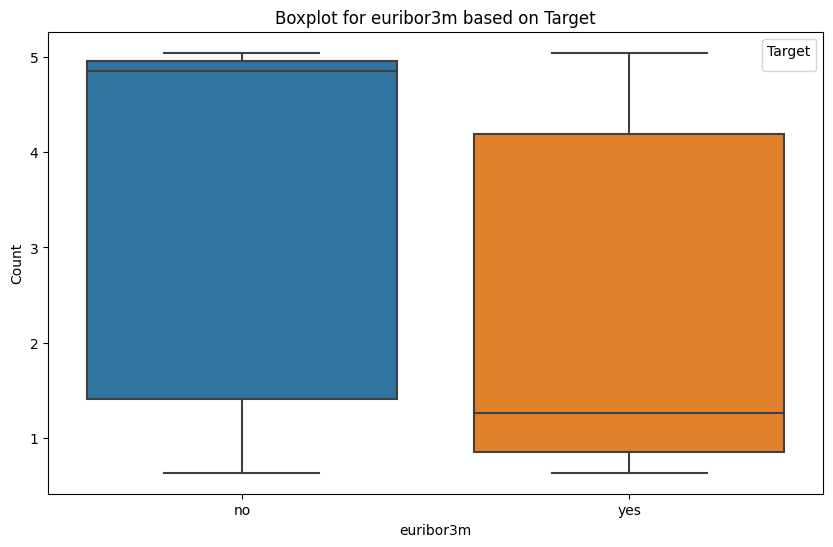

In [21]:
for var in numerical:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=target, data=df, y=var)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Boxplot for {var} based on Target')
    plt.legend(title='Target', loc='upper right')
    plt.show()

0.11440953955608998

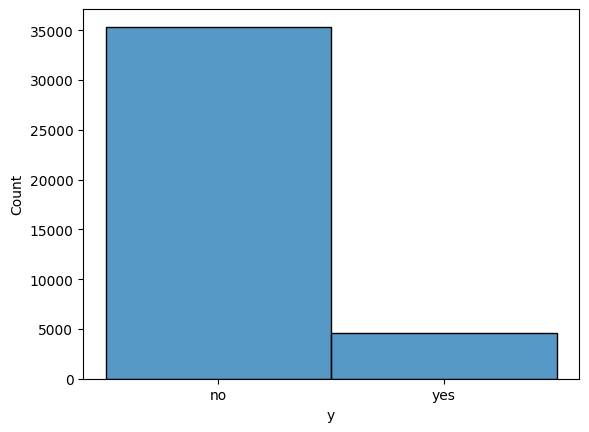

In [22]:
# check the imbalance of target variable (11% of the data only)

sns.histplot(data=df, x='y')
(df['y']=='yes').sum() / ((df['y']=='yes').sum() + (df['y']=='no').sum())

In [23]:
# # More detailed exploration
# sns.pairplot(df, hue=target)
# plt.show()

In [24]:
# Import vairous liabraries for machine learning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, classification_report
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [25]:
# Summarize the various features used for model building
numerical = ['age','campaign','previous','pdays','cons.conf.idx','euribor3m']
categorical = ['job','marital','education','loan','contact','month','poutcome']
target = 'y'

In [26]:
# Separate features and target
X = df[categorical + numerical]
y = df[target]

# Transform target variable to 1 and 0 using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# build pipeline
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical),
                                                 ('num', num_transformer, numerical)])

# Combine preprocessing and SMOTE in the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=1234))  # Include SMOTE in the pipeline
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Apply the pipeline on the training data
X_train_transformed, y_train_transformed = pipeline['smote'].fit_resample(pipeline['preprocessor'].fit_transform(X_train), y_train)
X_test_transformed = pipeline['preprocessor'].fit_transform(X_test)

In [27]:

# Build the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7411072144288577
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.75      0.84      7091
           1       0.25      0.64      0.36       893

    accuracy                           0.74      7984
   macro avg       0.59      0.70      0.60      7984
weighted avg       0.87      0.74      0.78      7984



In [28]:
# params_knn = {'n_neighbors': list(range(1,500)), 'weights': ['uniform', 'distance']}
# randomsearch_knn = RandomizedSearchCV(knn_model, params_knn, cv=10, n_iter=100, scoring='recall')

# randomsearch_knn.fit(X_train_transformed, y_train_transformed)

# print("Best parameters from RandomSearch: ", randomsearch_knn.best_params_)

Best parameters from RandomSearch:  {'weights': 'uniform', 'n_neighbors': 7}

In [29]:
# Import vairous liabraries for machine learning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, classification_report

# Build the KNN model
lr_model = LogisticRegression(max_iter=300)
lr_model.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set
y_pred = lr_model.predict(X_test_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.811748496993988
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      7091
           1       0.33      0.66      0.44       893

    accuracy                           0.81      7984
   macro avg       0.64      0.75      0.66      7984
weighted avg       0.88      0.81      0.84      7984



In [30]:
from sklearn.svm import SVC

# Assuming 'X_train' and 'y_train' are your training data and labels
svc_linear_model = SVC(kernel='linear')
svc_linear_model.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set
y_pred = svc_linear_model.predict(X_test_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7220691382765531
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.72      0.82      7091
           1       0.25      0.74      0.37       893

    accuracy                           0.72      7984
   macro avg       0.60      0.73      0.60      7984
weighted avg       0.88      0.72      0.77      7984



In [31]:
from sklearn.svm import SVC

# Assuming 'X_train' and 'y_train' are your training data and labels
svc_model = SVC(kernel='rbf', gamma=0.1)
svc_model.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set
y_pred = svc_model.predict(X_test_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8699899799599199
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7091
           1       0.43      0.50      0.46       893

    accuracy                           0.87      7984
   macro avg       0.68      0.71      0.69      7984
weighted avg       0.88      0.87      0.87      7984



In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Assuming 'X_train' and 'y_train' are your training data and labels
gbc_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01)
gbc_model.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set
y_pred = gbc_model.predict(X_test_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7578907815631263
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      7091
           1       0.28      0.71      0.40       893

    accuracy                           0.76      7984
   macro avg       0.62      0.74      0.62      7984
weighted avg       0.88      0.76      0.80      7984



In [33]:
# # Perform cross-validation
# cv_scores_svc = cross_val_score(svc_linear_model, X_train_transformed, y_train_transformed, cv=5, scoring='recall')

# print("Cross-validation scores for KNN: ", cv_scores_svc)

# # Evaluate on the test set
# y_pred_svc = svc_linear_model.predict(X_test_transformed)
# print("Test accuracy for svc: ", recall_score(y_test, y_pred_svc))

Cross-validation scores for KNN:  [0.71001415 0.71956829 0.70682944 0.71567587 0.71284501]
Test accuracy for svc:  0.7413213885778276


In [34]:
# params_gbc = {'n_estimators': list(range(50,500)),'learning_rate': [0.01,0.01,0.1,0.2],'max_depth': list(range(1,5))}

# randomsearch_gbc = RandomizedSearchCV(gbc_model, params_gbc, cv=5, n_iter=50, scoring='recall', random_state=1234)
# randomsearch_gbc.fit(X_train_transformed, y_train_transformed)

# print("Best parameters from RandomSearch: ", randomsearch_gbc.best_params_)

Best parameters from RandomSearch:  {'n_estimators': 84, 'max_depth': 4, 'learning_rate': 0.2}


Above code is to explore the hyperparameter tunning for GBC on n_estimators, learning rate and max depth. the code are commented due to the long runtime (~3hours) and the results is pasted as below.

### Best parameters from RandomSearch:  {'n_estimators': 84, 'max_depth': 4, 'learning_rate': 0.2}

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

# Assuming 'X_train' and 'y_train' are your training data and labels
gbc_model_best = GradientBoostingClassifier(n_estimators=84, max_depth=4, learning_rate=0.2)
gbc_model_best.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set
y_pred = gbc_model_best.predict(X_test_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6677104208416834
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.67      0.78      7091
           1       0.20      0.67      0.31       893

    accuracy                           0.67      7984
   macro avg       0.57      0.67      0.55      7984
weighted avg       0.86      0.67      0.73      7984



In [36]:
# # Perform cross-validation
# cv_scores_gbc = cross_val_score(gbc_model, X_train_transformed, y_train_transformed, cv=5, scoring='recall')

# print("Cross-validation scores for gbc: ", cv_scores_gbc)

# # Evaluate on the test set
# y_pred_gbc = gbc_model.predict(X_test_transformed)
# print("Test accuracy for gbc: ", recall_score(y_test, y_pred_gbc))

Cross-validation scores for gbc:  [0.60934183 0.68789809 0.67232838 0.70612173 0.70559094]
Test accuracy for gbc:  0.7144456886898096


In [37]:
# # Perform cross-validation
# cv_scores_gbc_best = cross_val_score(gbc_model_best, X_train_transformed, y_train_transformed, cv=5, scoring='recall')

# print("Cross-validation scores for gbc: ", cv_scores_gbc_best)

# # Evaluate on the test set
# y_pred_gbc_best = gbc_model_best.predict(X_test_transformed)
# print("Test accuracy for gbc: ", recall_score(y_test, y_pred_gbc_best))

Cross-validation scores for gbc:  [0.43719038 0.98195329 0.97841472 0.98213022 0.97876858]
Test accuracy for gbc:  0.6685330347144457


Below code is to explore the hyperparameters for SVC model using polynomial kernel. The "C" represents the regularization parameter on the trade-off between margin and classification error.  Larger value on "C" represents thinner margin but lower classification error. "Degree" represents the degree of polynomial applied.

Due to the long runtime (~two hours), this portion of code is commented and the result is extracted below.

### Results: Best parameters from RandomSearch:  {'C': 4.7985894002072, 'degree': 3, 'kernel': 'poly'}

In [38]:
# from scipy.stats import expon
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
# from sklearn.compose import ColumnTransformer
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, classification_report
# from sklearn.svm import SVC

# params_svc = {'C': expon(scale=1),
#               'kernel': ['poly'],
#               'degree': [2, 3, 4],  # Applicable for polynomial kernel
#               }

# svc_model_cv = SVC()
# randomsearch_gbc = RandomizedSearchCV(svc_model_cv, params_svc, cv=5, n_iter=10, scoring='recall')
# randomsearch_gbc.fit(X_train_transformed, y_train_transformed)

# print("Best parameters from RandomSearch: ", randomsearch_gbc.best_params_)

In [39]:
from sklearn.svm import SVC

# Assuming 'X_train' and 'y_train' are your training data and labels
svc_model_best = SVC(kernel='poly', C=4.7985894, degree=3)
svc_model_best.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set
y_pred_svc_best = svc_model_best.predict(X_test_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_svc_best))
print("Classification Report:")
print(classification_report(y_test, y_pred_svc_best))

Accuracy: 0.8708667334669339
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7091
           1       0.43      0.48      0.45       893

    accuracy                           0.87      7984
   macro avg       0.68      0.70      0.69      7984
weighted avg       0.88      0.87      0.87      7984

